# Propósito

Este notebook tem como objetivo realizar uma análise exploratória de algumas colunas de interesse das medições dos sensores de qualidade do ar.

O principal objetivo será verificar a distribuição de cada coluna e determinar se elas seguem uma distribuição normal. Para isso, utilizaremos técnicas como o **Teste de Shapiro-Wilk** e o **Q-Q Plot**, que nos ajudarão a verificar a aderência à normalidade.

Em seguida, as colunas que não apresentarem uma distribuição normal serão transformadas utilizando técnicas como **Box-Cox** para aproximá-las de uma distribuição normal.

Por fim, geraremos gráficos de histograma para visualizar se as transformações resultaram em uma distribuição mais próxima da normalidade.

# Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import shapiro, anderson, boxcox, kstest, norm
from scipy.special import boxcox1p
from scipy import stats

# Consumindo bases

In [2]:
url_sensor_bangu = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_bangu_preenchido.csv'
url_sensor_campo_grande = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_campo_grande_preenchido.csv'
url_sensor_pedra_guaratiba = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_pedra_guaratiba_preenchido.csv'
url_sensor_iraja = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_iraja_preenchido.csv'
url_sensor_tijuca = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_tijuca_preenchido.csv'
url_sensor_sao_cristovao = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_sao_cristovao_preenchido.csv'
url_sensor_copacabana = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_copacabana_preenchido.csv'
url_sensor_centro = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_centro_preenchido.csv'

df_sensor_bangu = pd.read_csv(url_sensor_bangu, sep=',')
df_sensor_campo_grande = pd.read_csv(url_sensor_campo_grande, sep=',')
df_sensor_pedra_guaratiba = pd.read_csv(url_sensor_pedra_guaratiba, sep=',')
df_sensor_iraja = pd.read_csv(url_sensor_iraja, sep=',')
df_sensor_tijuca = pd.read_csv(url_sensor_tijuca, sep=',')
df_sensor_sao_cristovao = pd.read_csv(url_sensor_sao_cristovao, sep=',')
df_sensor_copacabana = pd.read_csv(url_sensor_copacabana, sep=',')
df_sensor_centro = pd.read_csv(url_sensor_centro, sep=',')

# Concatenando dataframe das estações após o tratamento

In [3]:
df_sensor = pd.concat([df_sensor_bangu, df_sensor_campo_grande, df_sensor_pedra_guaratiba, df_sensor_iraja, df_sensor_tijuca, df_sensor_sao_cristovao, df_sensor_copacabana, df_sensor_centro])

df_sensor.reset_index(drop=True, inplace=True)

In [4]:
df_sensor

,nome_estacao,data,chuva,temp,ur,co,no,no2,nox,so2,o3,pm10,pm2_5,data_formatada,ano,mes,no_nulos_no_dia,no2_nulos_no_dia,nox_nulos_no_dia
0,ESTAÇÃO BANGU,2012-01-01 03:30:00,0.2,24.67,95.24,0.42,2.18,15.18,17.36,NaN,28.06,81.0,NaN,2012-01-01,2012,1,NaN,NaN,NaN
1,ESTAÇÃO BANGU,2012-01-01 04:30:00,0.4,24.72,94.13,0.35,1.63,9.50,11.12,0.40,32.81,61.0,NaN,2012-01-01,2012,1,NaN,NaN,NaN
2,ESTAÇÃO BANGU,2012-01-01 05:30:00,0.0,24.49,92.91,0.27,1.73,8.74,10.47,0.12,31.61,26.0,NaN,2012-01-01,2012,1,NaN,NaN,NaN
3,ESTAÇÃO BANGU,2012-01-01 06:30:00,0.2,24.54,92.59,0.21,1.18,5.51,6.68,0.00,37.39,20.0,NaN,2012-01-01,2012,1,NaN,NaN,NaN
4,ESTAÇÃO BANGU,2012-01-01 07:30:00,0.4,24.78,90.71,0.16,0.95,8.41,9.35,0.00,33.45,7.0,NaN,2012-01-01,2012,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549810,ESTAÇÃO CENTRO,2019-12-31 19:30:00,0.0,33.33,52.18,0.42,NaN,NaN,NaN,NaN,53.95,19.0,NaN,2019-12-31,2019,12,NaN,NaN,NaN
549811,ESTAÇÃO CENTRO,2019-12-31 20:30:00,0.0,32.22,55.83,0.48,NaN,NaN,NaN,NaN,41.59,27.0,NaN,2019-12-31,2019,12,NaN,NaN,NaN
549812,ESTAÇÃO CENTRO,2019-12-31 21:30:00,0.0,31.30,54.97,0.47,NaN,NaN,NaN,NaN,32.99,27.0,NaN,2019-12-31,2019,12,NaN,NaN,NaN
549813,ESTAÇÃO CENTRO,2019-12-31 22:30:00,0.0,31.32,54.45,0.51,NaN,NaN,NaN,NaN,12.31,27.0,NaN,2019-12-31,2019,12,NaN,NaN,NaN


# Air Quality Index (AQI)

In [5]:
df_sensor = df_sensor.sort_values(by=['data_formatada'])

## Poluentes breakpoints

In [6]:
pm25_breakpoints = [
    (0.0, 9.0, 0, 50),        # Good
    (9.1, 35.4, 51, 100),     # Moderate
    (35.5, 55.4, 101, 150),   # Unhealthy for Sensitive Groups
    (55.5, 125.4, 151, 200),  # Unhealthy
    (125.5, 225.4, 201, 300), # Very Unhealthy
    (225.5, 325.4, 301, 400), # Hazardous
    (325.5, 99999.9, 401, 500) # Hazardous (Emergency)
]

In [7]:
pm10_breakpoints = [
    (0.0, 54.0, 0, 50),       # Good
    (55.0, 154.0, 51, 100),   # Moderate
    (155.0, 254.0, 101, 150), # Unhealthy for Sensitive Groups
    (255.0, 354.0, 151, 200), # Unhealthy
    (355.0, 424.0, 201, 300), # Very Unhealthy
    (425.0, 604.0, 301, 400), # Hazardous
    (605.0, 99999.9, 401, 500) # Hazardous (Emergency)
]

In [8]:
# Breakpoints para CO (8h)
co_8h_breakpoints = [
    (0.0, 4.4, 0, 50),
    (4.5, 9.4, 51, 100),
    (9.5, 12.4, 101, 150),
    (12.5, 15.4, 151, 200),
    (15.5, 30.4, 201, 300),
    (30.5, 50.4, 301, 400),
    (50.4, 99999.9, 401, 500)
]

In [9]:
no2_1h_breakpoints = [
    (0.0, 53.0, 0, 50),       # Good
    (54.0, 100.0, 51, 100),   # Moderate
    (101.0, 360.0, 101, 150), # Unhealthy for Sensitive Groups
    (361.0, 649.0, 151, 200), # Unhealthy
    (650.0, 1249.0, 201, 300),# Very Unhealthy
    (1250.0, 2049.0, 301, 400), # Hazardous
    (2050.0, 99999.0, 401, 500) # Hazardous (Emergency)
]

In [10]:
o3_8h_breakpoints = [
    (0.0, 0.054, 0, 50),      # Good
    (0.055, 0.07, 51, 100),   # Moderate
    (0.071, 0.085, 101, 150), # Unhealthy for Sensitive Groups
    (0.086, 0.105, 151, 200), # Unhealthy
    (0.106, 0.2, 201, 300)    # Very Unhealthy
]

In [11]:
so2_1h_breakpoints = [
    (0.0, 0.034, 0, 50),       # Good
    (0.035, 0.144, 51, 100),    # Moderate
    (0.145, 0.224, 101, 150),  # Unhealthy for Sensitive Groups
    (0.225, 0.304, 151, 200), # Unhealthy
    (0.305, 0.604, 201, 300), # Very Unhealthy
    (0.604, 0.804, 301, 400), # Very Unhealthy
    (0.805, 99999.0, 401, 500) # Very Unhealthy
]

## Formula para cada poluente

### PM10

In [12]:
# Função para calcular AQI com base em um valor de PM10
def calcular_aqi_pm10(concentracao):
    for c_low, c_high, i_low, i_high in pm10_breakpoints:
        if c_low <= concentracao <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentracao - c_low) + i_low
    return None  # Se não estiver em nenhum intervalo

In [13]:
# Agrupar por nome_estacao e data, calculando média de pm10
df_aqi_pm10 = (
    df_sensor
    .groupby(['data_formatada'])['pm10']
    .mean()
    .reset_index(name='pm10_medio')
)

# Calcular AQI
df_aqi_pm10['aqi_pm10'] = df_aqi_pm10['pm10_medio'].apply(calcular_aqi_pm10)

### PM2.5

In [14]:
# Função para calcular AQI com base em um valor de PM2.5
def calcular_aqi_pm25(concentracao):
    for c_low, c_high, i_low, i_high in pm25_breakpoints:
        if c_low <= concentracao <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentracao - c_low) + i_low
    return None  # Se não estiver em nenhum intervalo

In [15]:
# Agrupar por nome_estacao e data, calculando média de pm2_5
df_aqi_pm2_5 = (
    df_sensor
    .groupby(['data_formatada'])['pm2_5']
    .mean()
    .reset_index(name='pm2_5_medio')
)

# Calcular AQI
df_aqi_pm2_5['aqi_pm2_5'] = df_aqi_pm2_5['pm2_5_medio'].apply(calcular_aqi_pm25)

### CO

In [16]:
# Função AQI CO
def calcular_aqi_co(concentracao):
    for c_low, c_high, i_low, i_high in co_8h_breakpoints:
        if c_low <= concentracao <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentracao - c_low) + i_low
    return None

In [17]:
# Calcular média móvel de 8h para CO por estação
df_sensor['co_8h_media'] = (
    df_sensor['co'].transform(lambda x: x.rolling(window=8, min_periods=8).mean())
)

# Filtrar apenas valores válidos da média de 8h
df_co_max = (
    df_sensor.dropna(subset=['co_8h_media'])
    .groupby(['data_formatada'])['co_8h_media']
    .max()
    .reset_index(name='co_8h_max')
)

# Calcular AQI para o CO
df_co_max['aqi_co'] = df_co_max['co_8h_max'].apply(calcular_aqi_co)

### NO2

In [18]:
def calcular_aqi_no2(concentracao):
    for c_low, c_high, i_low, i_high in no2_1h_breakpoints:
        if c_low <= concentracao <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentracao - c_low) + i_low
    return None

In [19]:
df_no2_max = (
    df_sensor
    .groupby(['data_formatada'])['no2']
    .max()
    .reset_index(name='no2_1h_max')
)

df_no2_max['aqi_no2'] = df_no2_max['no2_1h_max'].apply(calcular_aqi_no2)

### O3

Utilizei esse site para verificar se a conversão estava correta https://en.air-q.com/einheiten-umrechner

In [20]:
def ugm3_to_ppm_o3(valor_ugm3):
    """
    Converte concentração de ozônio de µg/m³ para ppm, assumindo:
    - Temperatura de 25°C
    - Pressão de 1 atm
    - Condições padrão (CNTP)
    """

    # 1. Massa molar do Ozônio (O₃) em g/mol
    o3_massa_molar = 48.0  # g/mol

    # 2. Volume molar de um gás ideal a CNTP (25°C e 1 atm)
    volume_molar = 24.45  # litros/mol

    # 3. Fator de conversão: µg/m³ para ppm
    # Fórmula: ppm = (µg/m³ * 24.45) / (massa_molar * 1000)
    # Multiplica por 24.45 (volume molar), divide pela massa molar e por 1000 (para converter µg -> mg -> g)
    ppm = (valor_ugm3 * volume_molar) / (o3_massa_molar * 1000)

    return ppm

In [21]:
df_sensor['o3_ppm'] = df_sensor['o3'].apply(ugm3_to_ppm_o3)

In [22]:
# Função para calcular o AQI do O₃
def calcular_aqi_o3(ppm):
    for c_low, c_high, i_low, i_high in o3_8h_breakpoints:
        if c_low <= ppm <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (ppm - c_low) + i_low
    return None

In [23]:
# Calcular média móvel de 8 horas por estação
df_sensor['o3_8h_avg'] = (
    df_sensor['o3_ppm'].transform(lambda x: x.rolling(window=8, min_periods=8).mean())
)

# Agrupar por estação + dia e pegar o maior valor da média móvel de 8h
df_o3_8h_max = (
    df_sensor.dropna(subset=['co_8h_media'])
    .groupby(['data_formatada'])['o3_8h_avg']
    .max()
    .reset_index(name='o3_8h_max')
)

# Calcular o AQI
df_o3_8h_max['aqi_o3'] = df_o3_8h_max['o3_8h_max'].apply(calcular_aqi_o3)

### SO2

In [24]:
def ugm3_to_ppm_so2(valor_ugm3):
    """
    Converte concentração de dióxido de enxofre (SO2) de µg/m³ para ppm, assumindo:
    - Temperatura de 25°C
    - Pressão de 1 atm
    - Condições padrão (CNTP)
    """

    # 1. Massa molar do SO₂ em g/mol
    so2_massa_molar = 64.066  # g/mol

    # 2. Volume molar do gás ideal a CNTP (25°C e 1 atm)
    volume_molar = 24.45  # litros/mol

    # 3. Cálculo da conversão
    # Fórmula: ppm = (µg/m³ * volume molar) / (massa molar * 1000)
    # Multiplica por 24.45 (volume molar), divide pela massa molar e por 1000 (para converter µg → g)
    ppm = (valor_ugm3 * volume_molar) / (so2_massa_molar * 1000)

    return ppm

In [25]:
df_sensor['so2_ppm'] = df_sensor['so2'].apply(ugm3_to_ppm_so2)

In [26]:
def calcular_aqi_so2(concentracao):
    for c_low, c_high, i_low, i_high in so2_1h_breakpoints:
        if c_low <= concentracao <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (concentracao - c_low) + i_low
    return None

In [27]:
df_so2_max = (
    df_sensor
    .groupby(['data_formatada'])['so2_ppm']
    .max()
    .reset_index(name='so2_1h_max')
)

df_so2_max['aqi_so2'] = df_so2_max['so2_1h_max'].apply(calcular_aqi_so2)

## Unificando

In [28]:
# Juntar ambos
df_merged = pd.merge(df_aqi_pm2_5, df_aqi_pm10, on=['data_formatada'], how='outer')
df_merged = pd.merge(df_merged, df_no2_max, on=['data_formatada'], how='outer')
df_merged = pd.merge(df_merged, df_co_max, on=['data_formatada'], how='outer')
df_merged = pd.merge(df_merged, df_o3_8h_max, on=['data_formatada'], how='outer')
df_merged = pd.merge(df_merged, df_so2_max, on=['data_formatada'], how='outer')

# AQI final do dia
df_merged['aqi_final'] = df_merged[['aqi_pm2_5', 'aqi_co', 'aqi_pm10', 'aqi_no2', 'aqi_o3', 'aqi_so2']].max(axis=1)

In [29]:
df_aqi_final = df_merged[['data_formatada', 'aqi_final']]

In [30]:
def classificar_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    elif aqi <= 500:
        return 'Hazardous'
    else:
        return 'Invalid AQI'

In [31]:
df_aqi_final['descricao_aqi'] = df_aqi_final['aqi_final'].apply(classificar_aqi)

<ipython-input-31-fc3ebab32216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi_final['descricao_aqi'] = df_aqi_final['aqi_final'].apply(classificar_aqi)


In [32]:
df_aqi_final.to_csv('air_quality_index_per_day.csv', index=False)

## AQI

### Análise exploratória

In [33]:
#@title Describe dos dados

df_aqi_final['aqi_final'].describe()

,aqi_final
count,2899.000000
mean,80.107446
std,25.403466
min,20.601852
25%,61.297189
50%,75.990000
75%,96.282391
max,225.650863


### Visualização gráfica

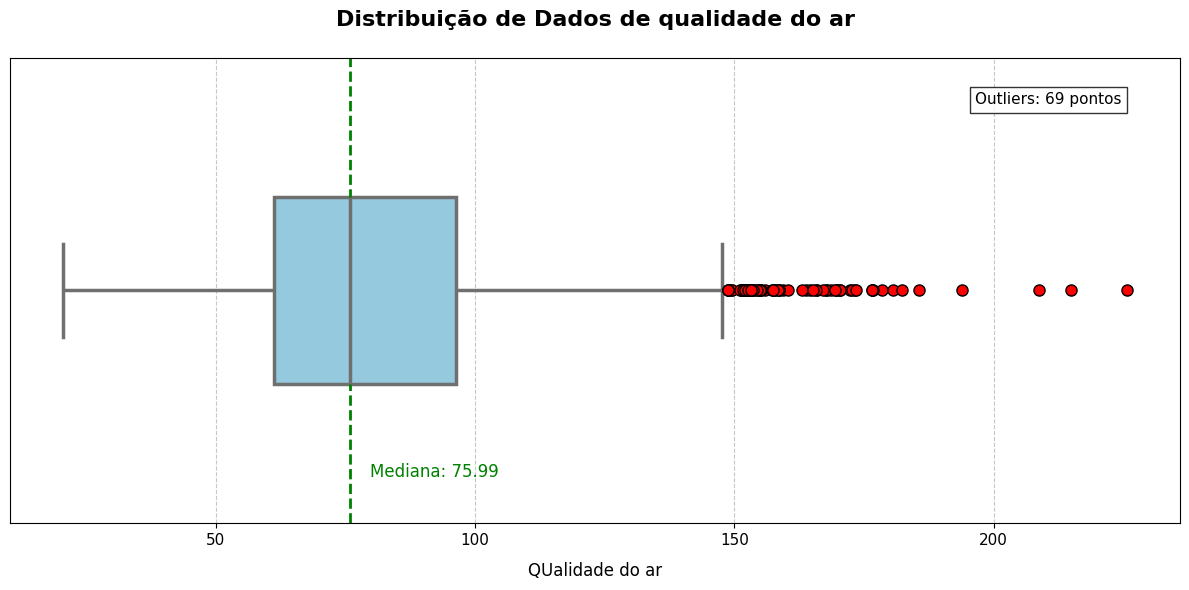

In [34]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_aqi_final['aqi_final'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de qualidade do ar\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('QUalidade do ar',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_aqi_final['aqi_final'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f}',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_aqi_final['aqi_final'].quantile(0.25)
q3 = df_aqi_final['aqi_final'].quantile(0.75)
iqr = q3 - q1
outliers = df_aqi_final[(df_aqi_final['aqi_final'] < q1 - 1.5*iqr) |
                            (df_aqi_final['aqi_final'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

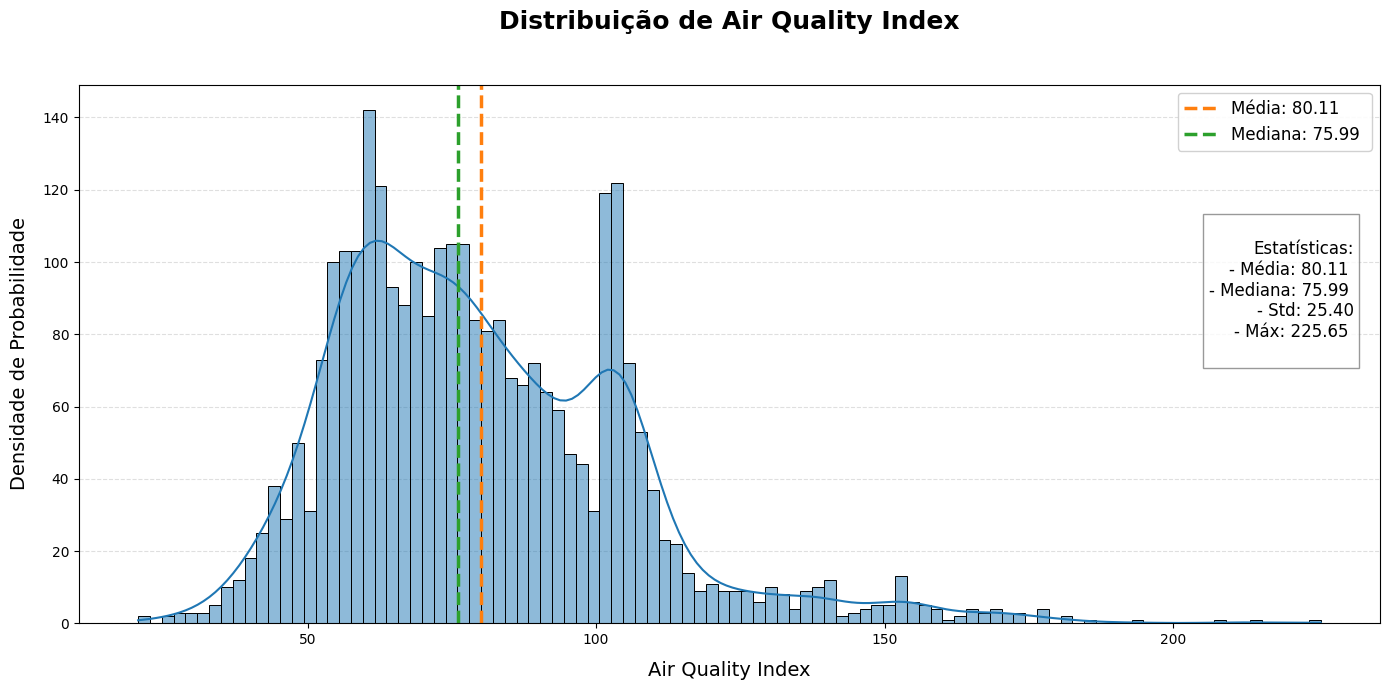

In [35]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_aqi_final, x='aqi_final',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Air Quality Index\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Air Quality Index', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_aqi_final['aqi_final'].mean()
median_val = df_aqi_final['aqi_final'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f}
- Mediana: {median_val:.2f}
- Std: {df_aqi_final["aqi_final"].std():.2f}
- Máx: {df_aqi_final["aqi_final"].max():.2f}
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [36]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_aqi_final['aqi_final'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'aqi_final'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'aqi_final'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'aqi_final'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para aqi_final: Estatística = 0.940, p-valor = 0.000
aqi_final NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 9.679281450029815e-20


In [37]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.061, p-valor = 0.001
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.0010391323542983495


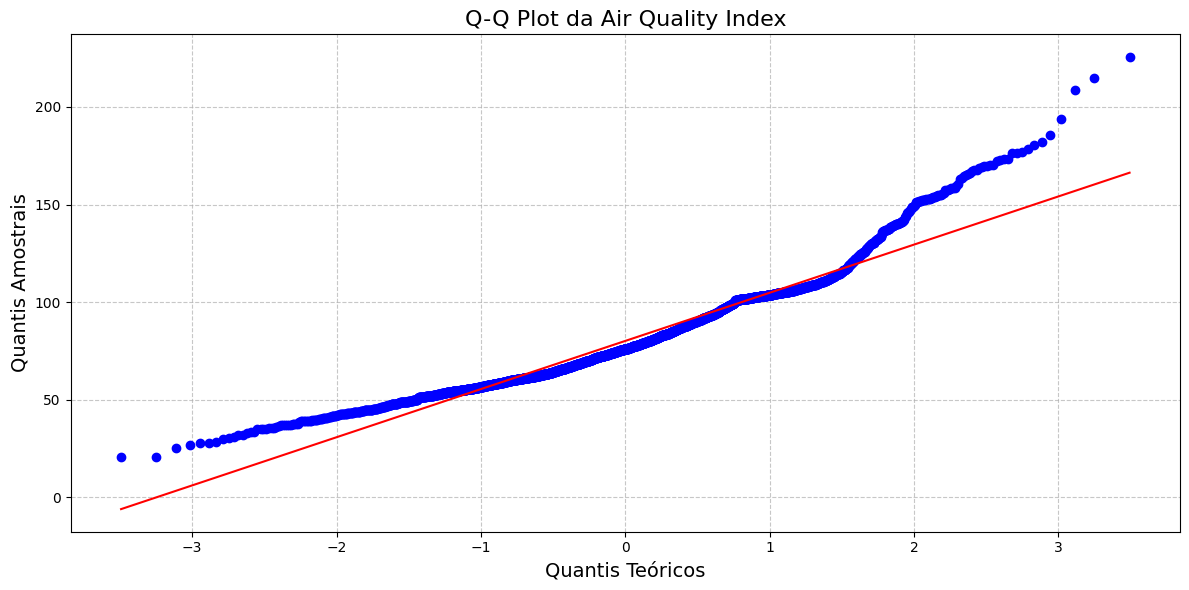

In [38]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_aqi_final['aqi_final'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Air Quality Index", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Dados Não Normais:**

O desvio sistemático da linha, principalmente nas caudas, confirma o resultado do teste de Shapiro-Wilk (p-valor = 0.000).

Isso é típico em dados de chuva, que frequentemente têm:

- Assimetria positiva: Muitos valores baixos/zeros e alguns extremamente altos.

- Caudas pesadas: Valores de precipitação extrema que não são compatíveis com uma distribuição normal.

**Padrão de Desvio:**

Se os pontos ficam abaixo da linha no lado esquerdo e acima no lado direito, isso sugere assimetria positiva (comum em dados de chuva).

Se o gráfico mostrar uma curva em "S" ou formas não lineares, indica caudas mais pesadas ou mais leves que o esperado na normal.

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [ ]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['chuva_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['chuva'].notna()
# chuva_validos = df_sensor.loc[mask, 'chuva']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'chuva_boxcox'] = boxcox1p(chuva_validos, lambda_boxcox)

In [39]:
df_aqi_final['aqi_final_boxcox'] = np.nan

mask = (df_aqi_final['aqi_final'].notna())

aqi_final_validos = df_aqi_final.loc[mask, 'aqi_final']

aqi_final_boxcox, lambda_boxcox = stats.boxcox(aqi_final_validos + 1)

df_aqi_final.loc[mask, 'aqi_final_boxcox'] = aqi_final_boxcox

<ipython-input-39-eedacd6ac11d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi_final['aqi_final_boxcox'] = np.nan


### Testes de normalidade após Boxcox



In [40]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_aqi_final['aqi_final_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'aqi_final_boxcox'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'aqi_final_boxcox'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'aqi_final_boxcox'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para aqi_final_boxcox: Estatística = 0.996, p-valor = 0.007
aqi_final_boxcox NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.007444500904205537


In [41]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.034, p-valor = 0.198
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.19802961642722194


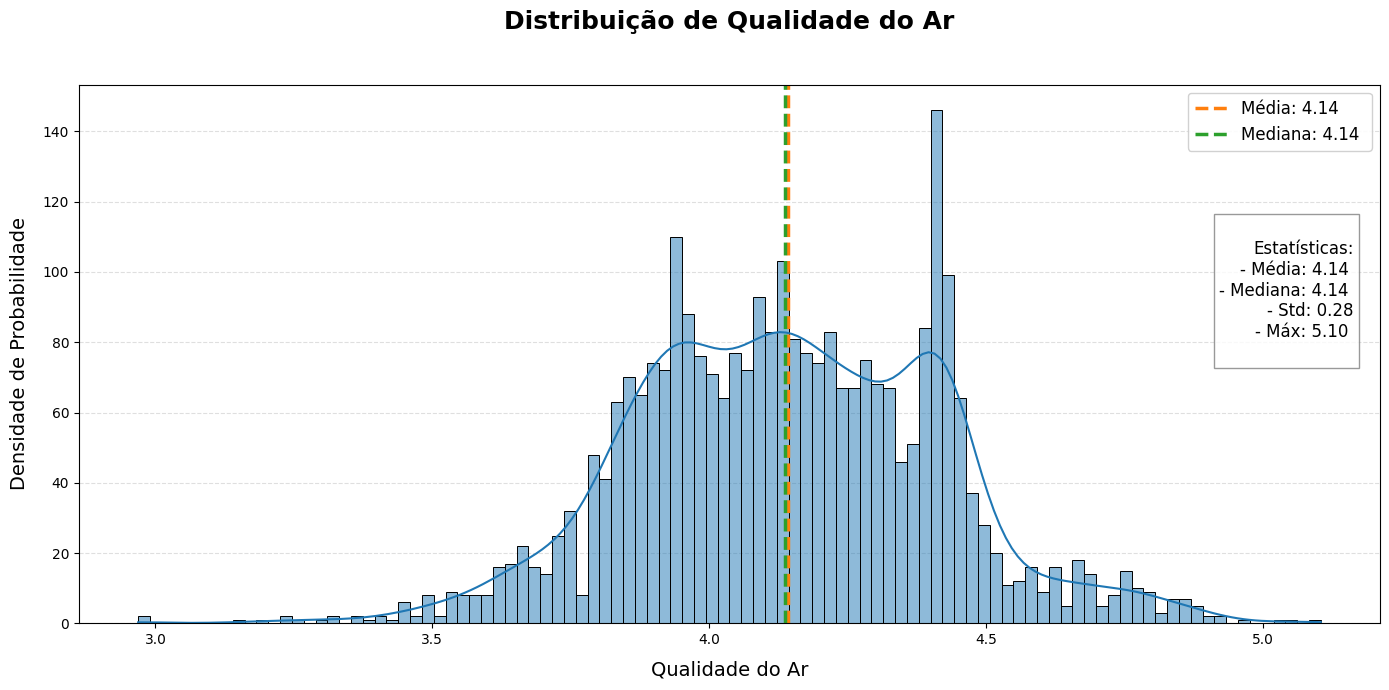

In [46]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_aqi_final, x='aqi_final_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Qualidade do Ar\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Qualidade do Ar', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_aqi_final['aqi_final_boxcox'].mean()
median_val = df_aqi_final['aqi_final_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f}
- Mediana: {median_val:.2f}
- Std: {df_aqi_final["aqi_final_boxcox"].std():.2f}
- Máx: {df_aqi_final["aqi_final_boxcox"].max():.2f}
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

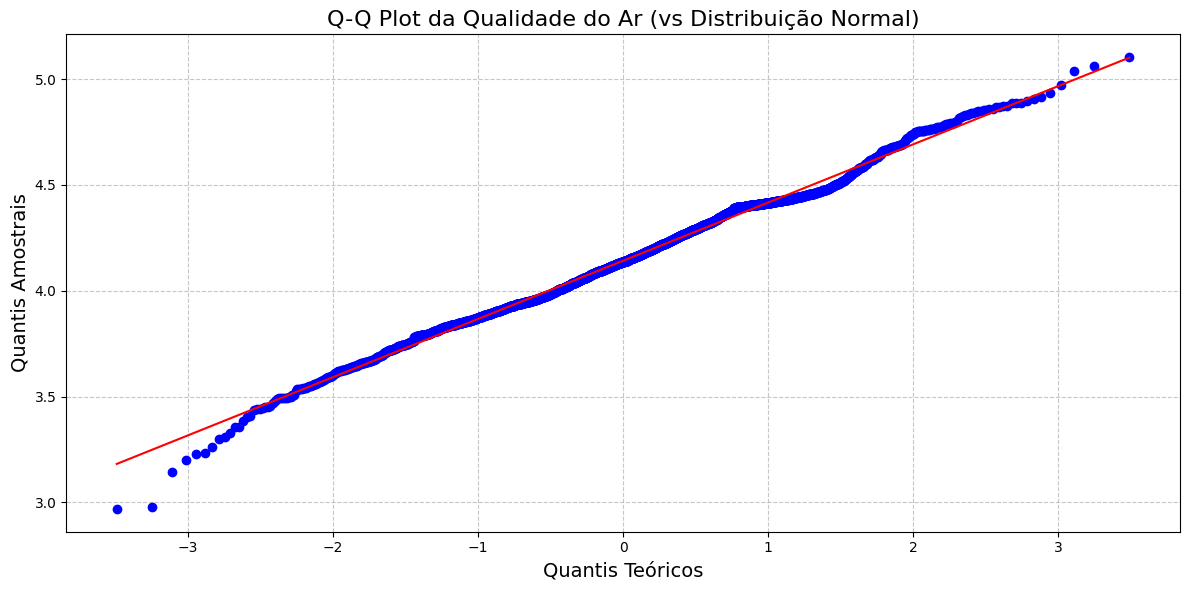

In [44]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_aqi_final['aqi_final_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Qualidade do Ar (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna Chuva

In [47]:
#@title Dropando colunas aqi_final e renomeando 'aqi_final_boxcox' para aqi_final

df_aqi_final.drop(columns=['aqi_final'], inplace=True)
df_aqi_final.rename(columns={'aqi_final_boxcox': 'aqi_final'}, inplace=True)

<ipython-input-47-c27e6c31f15d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi_final.drop(columns=['aqi_final'], inplace=True)
<ipython-input-47-c27e6c31f15d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi_final.rename(columns={'aqi_final_boxcox': 'aqi_final'}, inplace=True)


In [48]:
df_aqi_final

,data_formatada,descricao_aqi,aqi_final
0,2012-01-01,Moderate,3.945046
1,2012-01-02,Moderate,4.018683
2,2012-01-03,Moderate,4.023832
3,2012-01-04,Moderate,4.289627
4,2012-01-05,Moderate,4.365032
...,...,...,...
2894,2019-12-27,Moderate,4.067038
2895,2019-12-28,Moderate,3.906932
2896,2019-12-29,Good,3.500325
2897,2019-12-30,Moderate,3.796664


In [49]:
df_aqi_final.to_csv('air_quality_index_per_day_boxcox.csv', index=False)